<a href="https://colab.research.google.com/github/nasywabefi/DataAnalyst_Kelompok10/blob/main/Dataanalist_Kelompok10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import dataset

In [2]:
url = "https://raw.githubusercontent.com/nasywabefi/DataAnalyst_Kelompok10/main/Superstore.csv"
superstore_df = pd.read_csv(url, encoding='ISO-8859-1')  # Gunakan encoding yang sesuai
# Tampilkan 5 baris pertama
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-17,11-11-17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-17,11-11-17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-17,16-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-16,18-10-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-16,18-10-16,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Pengecekan data kualitas data

melihat data type, adakah data null?

In [3]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

melihat info statistic :

In [4]:
superstore_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769060
std,2829.160653,32041.223413,626.651879
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


Melihat value pada cel city:


In [5]:
superstore_df.City.value_counts()

,count
City,
New York City,891
Los Angeles,728
Philadelphia,532
San Francisco,500
Seattle,426
...,...
San Mateo,1
Cheyenne,1
Conway,1


Melihat value pada cel state:


In [6]:
superstore_df.State.value_counts()

,count
State,
California,1946
New York,1097
Texas,973
Pennsylvania,582
Washington,504
Illinois,483
Ohio,454
Florida,373
Michigan,253


cek tipe frame:

In [7]:
print(type(superstore_df))

<class 'pandas.core.frame.DataFrame'>


karena harus mengambil data terbaru (2018), maka harus memanggil date.
kalo di liat di data frame, tipe data nya berupa objek, maka harusmengubahnya ke tipe lain.

masalha baru : data date tidak bisa di panggil karena ada beberapa column yang nama column nya ada ' ' maka spasi dihilangkan

In [8]:
superstore_df.columns = [col.replace(' ', '_') for col in superstore_df.columns]

# Periksa perubahan
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

raphin tipe data : ubah order_date ke datetime

In [9]:
print(superstore_df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [10]:
superstore_df.columns = superstore_df.columns.str.strip()

# Check the column names again to confirm
print(superstore_df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [11]:
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'], format='%d-%m-%y')

# Check the DataFrame after conversion
print(superstore_df.head())

   Row_ID        Order_ID Order_Date Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08  11-11-17    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11-11-17    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16-06-17    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18-10-16  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18-10-16  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Category Sub-Category

In [12]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   object        
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

ubah tipe data: ship date, dari object ke datetime

In [13]:
print(superstore_df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [14]:
superstore_df.columns = superstore_df.columns.str.strip()

# Check the column names again to confirm
print(superstore_df.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [15]:
superstore_df['Ship_Date'] = pd.to_datetime(superstore_df['Ship_Date'], format='%d-%m-%y')

# Check the DataFrame after conversion
print(superstore_df.head())

   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Category Sub-Ca

In [16]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

# urutin tanggal

In [17]:
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'], format='%d-%m-%y')

# Mengurutkan data berdasarkan kolom 'Order_Date' dari yang terbaru
superstore_df_sorted = superstore_df.sort_values(by='Order_Date', ascending=False)

# Tampilkan hasilnya
print(superstore_df_sorted.head())

      Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
645      646  CA-2018-126221 2018-12-30 2019-01-05  Standard Class   
5091    5092  CA-2018-156720 2018-12-30 2019-01-03  Standard Class   
908      909  CA-2018-143259 2018-12-30 2019-01-03  Standard Class   
907      908  CA-2018-143259 2018-12-30 2019-01-03  Standard Class   
906      907  CA-2018-143259 2018-12-30 2019-01-03  Standard Class   

     Customer_ID      Customer_Name      Segment        Country  \
645     CC-12430        Chuck Clark  Home Office  United States   
5091    JM-15580      Jill Matthias     Consumer  United States   
908     PO-18865  Patrick O'Donnell     Consumer  United States   
907     PO-18865  Patrick O'Donnell     Consumer  United States   
906     PO-18865  Patrick O'Donnell     Consumer  United States   

               City     State  Postal_Code   Region       Product_ID  \
645        Columbus   Indiana      47201.0  Central  OFF-AP-10002457   
5091       Loveland  Colorado   

mengambil hanya tahun 2018

In [18]:
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'], format='%d-%m-%y')

# Filter data untuk tahun 2018
superstore_df_2018 = superstore_df[superstore_df['Order_Date'].dt.year == 2018]

# Tampilkan hasilnya
print(superstore_df_2018)

      Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode  \
12        13  CA-2018-114412 2018-04-15 2018-04-20  Standard Class   
23        24  US-2018-156909 2018-07-16 2018-07-18    Second Class   
34        35  CA-2018-107727 2018-10-19 2018-10-23    Second Class   
41        42  CA-2018-120999 2018-09-10 2018-09-15  Standard Class   
43        44  CA-2018-139619 2018-09-19 2018-09-23  Standard Class   
...      ...             ...        ...        ...             ...   
9768    9769  CA-2018-142328 2018-12-07 2018-12-14  Standard Class   
9787    9788  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   
9788    9789  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   
9789    9790  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   
9790    9791  CA-2018-144491 2018-03-27 2018-04-01  Standard Class   

     Customer_ID    Customer_Name      Segment        Country           City  \
12      AA-10480     Andrew Allen     Consumer  United States        Concord   

melihatkan data statistik

In [19]:
superstore_df_2018.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales
count,3258.000000,3258,3258,3253.000000,3258.000000
mean,5007.294966,2018-08-08 06:03:18.895027456,2018-08-12 03:46:44.419889408,56321.457117,221.624316
min,13.000000,2018-01-01 00:00:00,2018-01-02 00:00:00,1841.000000,0.444000
25%,2628.250000,2018-05-18 00:00:00,2018-05-20 00:00:00,27834.000000,17.028000
50%,5080.500000,2018-09-02 00:00:00,2018-09-06 00:00:00,60505.000000,53.810000
75%,7372.750000,2018-11-06 00:00:00,2018-11-10 00:00:00,90032.000000,205.257100
max,9791.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,13999.960000
std,2771.092219,NaN,NaN,32011.403286,587.437724


cek info yang berada di

In [20]:
superstore_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3258 entries, 12 to 9790
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         3258 non-null   int64         
 1   Order_ID       3258 non-null   object        
 2   Order_Date     3258 non-null   datetime64[ns]
 3   Ship_Date      3258 non-null   datetime64[ns]
 4   Ship_Mode      3258 non-null   object        
 5   Customer_ID    3258 non-null   object        
 6   Customer_Name  3258 non-null   object        
 7   Segment        3258 non-null   object        
 8   Country        3258 non-null   object        
 9   City           3258 non-null   object        
 10  State          3258 non-null   object        
 11  Postal_Code    3253 non-null   float64       
 12  Region         3258 non-null   object        
 13  Product_ID     3258 non-null   object        
 14  Category       3258 non-null   object        
 15  Sub-Category   3258 non-n

cek data yang kosong

In [21]:
superstore_df_2018.isna().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


# mengolah data

In [22]:
superstore_df_2018.Product_ID.value_counts()

,count
Product_ID,
FUR-CH-10003774,8
TEC-AC-10003832,7
OFF-PA-10001970,7
OFF-BI-10004632,7
TEC-AC-10004510,7
...,...
TEC-AC-10004633,1
FUR-FU-10004164,1
TEC-PH-10002789,1


In [23]:
superstore_df_2018.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales
count,3258.000000,3258,3258,3253.000000,3258.000000
mean,5007.294966,2018-08-08 06:03:18.895027456,2018-08-12 03:46:44.419889408,56321.457117,221.624316
min,13.000000,2018-01-01 00:00:00,2018-01-02 00:00:00,1841.000000,0.444000
25%,2628.250000,2018-05-18 00:00:00,2018-05-20 00:00:00,27834.000000,17.028000
50%,5080.500000,2018-09-02 00:00:00,2018-09-06 00:00:00,60505.000000,53.810000
75%,7372.750000,2018-11-06 00:00:00,2018-11-10 00:00:00,90032.000000,205.257100
max,9791.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,13999.960000
std,2771.092219,NaN,NaN,32011.403286,587.437724


In [24]:
superstore_df_2018.Product_Name.value_counts()

,count
Product_Name,
Easy-staple paper,16
Staples,15
Staples in misc. colors,11
Staple envelope,11
Storex Dura Pro Binders,8
...,...
"Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 3/Pack",1
"Eldon 300 Class Desk Accessories, Black",1
LG Exalt,1


In [25]:
superstore_df_2018.Category.value_counts()

,count
Category,
Office Supplies,1970
Furniture,677
Technology,611


In [26]:
superstore_df_2018['Sub-Category'] .value_counts()

,count
Sub-Category,
Binders,492
Paper,452
Furnishings,310
Phones,290
Storage,281
Art,279
Accessories,266
Chairs,187
Appliances,161


In [27]:
superstore_df_2018.Segment.value_counts()

,count
Segment,
Consumer,1640
Corporate,969
Home Office,649


In [28]:
#penjualan berdasarkan kategory

perjualan_kategory_2018 = superstore_df_2018.groupby(['Category', 'Sub-Category'])['Sales'].sum()
perjualan_kategory_2018

Category         Sub-Category
Furniture        Bookcases        30024.2797
                 Chairs           93191.2730
                 Furnishings      28204.6920
                 Tables           60893.5425
Office Supplies  Appliances       40212.7220
                 Art               8825.6320
                 Binders          71721.2550
                 Envelopes         3378.5740
                 Fasteners          855.0740
                 Labels            3844.6960
                 Paper            27504.7760
                 Storage          68072.7020
                 Supplies         15952.1100
Technology       Accessories      58240.9700
                 Copiers          62899.3900
                 Machines         43544.6750
                 Phones          104685.6580
Name: Sales, dtype: float64

In [40]:
furniture_sales_2018 = superstore_df_2018[superstore_df_2018['Category'] == 'Furniture'].groupby('Sub-Category')['Sales'].sum().reset_index()
office_supplies_sales_2018 = superstore_df_2018[superstore_df_2018['Category'] == 'Office Supplies'].groupby('Sub-Category')['Sales'].sum().reset_index()
technology_sales_2018 = superstore_df_2018[superstore_df_2018['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum().reset_index()

# Tampilkan tabel penjualan per kategori
print("Penjualan Furniture berdasarkan Sub-Kategori:")
print(furniture_sales_2018)
print("\nPenjualan Office Supplies berdasarkan Sub-Kategori:")
print(office_supplies_sales_2018)
print("\nPenjualan Technology berdasarkan Sub-Kategori:")
print(technology_sales_2018)

Penjualan Furniture berdasarkan Sub-Kategori:
  Sub-Category       Sales
0    Bookcases  30024.2797
1       Chairs  93191.2730
2  Furnishings  28204.6920
3       Tables  60893.5425

Penjualan Office Supplies berdasarkan Sub-Kategori:
  Sub-Category      Sales
0   Appliances  40212.722
1          Art   8825.632
2      Binders  71721.255
3    Envelopes   3378.574
4    Fasteners    855.074
5       Labels   3844.696
6        Paper  27504.776
7      Storage  68072.702
8     Supplies  15952.110

Penjualan Technology berdasarkan Sub-Kategori:
  Sub-Category       Sales
0  Accessories   58240.970
1      Copiers   62899.390
2     Machines   43544.675
3       Phones  104685.658


In [41]:
# Filter data berdasarkan kategori dan sub-kategori untuk masing-masing kategori
furniture_sales_2018 = superstore_df_2018[superstore_df_2018['Category'] == 'Furniture'].groupby('Sub-Category')['Sales'].sum().reset_index()
office_supplies_sales_2018= superstore_df_2018[superstore_df_2018['Category'] == 'Office Supplies'].groupby('Sub-Category')['Sales'].sum().reset_index()
technology_sales_2018= superstore_df_2018[superstore_df_2018['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum().reset_index()

# Tampilkan hasil dalam bentuk DataFrame
print("DataFrame Penjualan Furniture berdasarkan Sub-Kategori:")
print(furniture_sales_2018)

print("\nDataFrame Penjualan Office Supplies berdasarkan Sub-Kategori:")
print(office_supplies_sales_2018)

print("\nDataFrame Penjualan Technology berdasarkan Sub-Kategori:")
print(technology_sales_2018)

DataFrame Penjualan Furniture berdasarkan Sub-Kategori:
  Sub-Category       Sales
0    Bookcases  30024.2797
1       Chairs  93191.2730
2  Furnishings  28204.6920
3       Tables  60893.5425

DataFrame Penjualan Office Supplies berdasarkan Sub-Kategori:
  Sub-Category      Sales
0   Appliances  40212.722
1          Art   8825.632
2      Binders  71721.255
3    Envelopes   3378.574
4    Fasteners    855.074
5       Labels   3844.696
6        Paper  27504.776
7      Storage  68072.702
8     Supplies  15952.110

DataFrame Penjualan Technology berdasarkan Sub-Kategori:
  Sub-Category       Sales
0  Accessories   58240.970
1      Copiers   62899.390
2     Machines   43544.675
3       Phones  104685.658


In [36]:
# Reset index untuk mengubah Series menjadi DataFrame
perjualan_kategory_2018_df = perjualan_kategory_2018.reset_index()

# Tampilkan DataFrame setelah reset index
print(perjualan_kategory_2018_df.head())


          Category Sub-Category       Sales
0        Furniture    Bookcases  30024.2797
1        Furniture       Chairs  93191.2730
2        Furniture  Furnishings  28204.6920
3        Furniture       Tables  60893.5425
4  Office Supplies   Appliances  40212.7220


<ipython-input-42-769717c6ba20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=total_sales_by_category, palette='viridis')


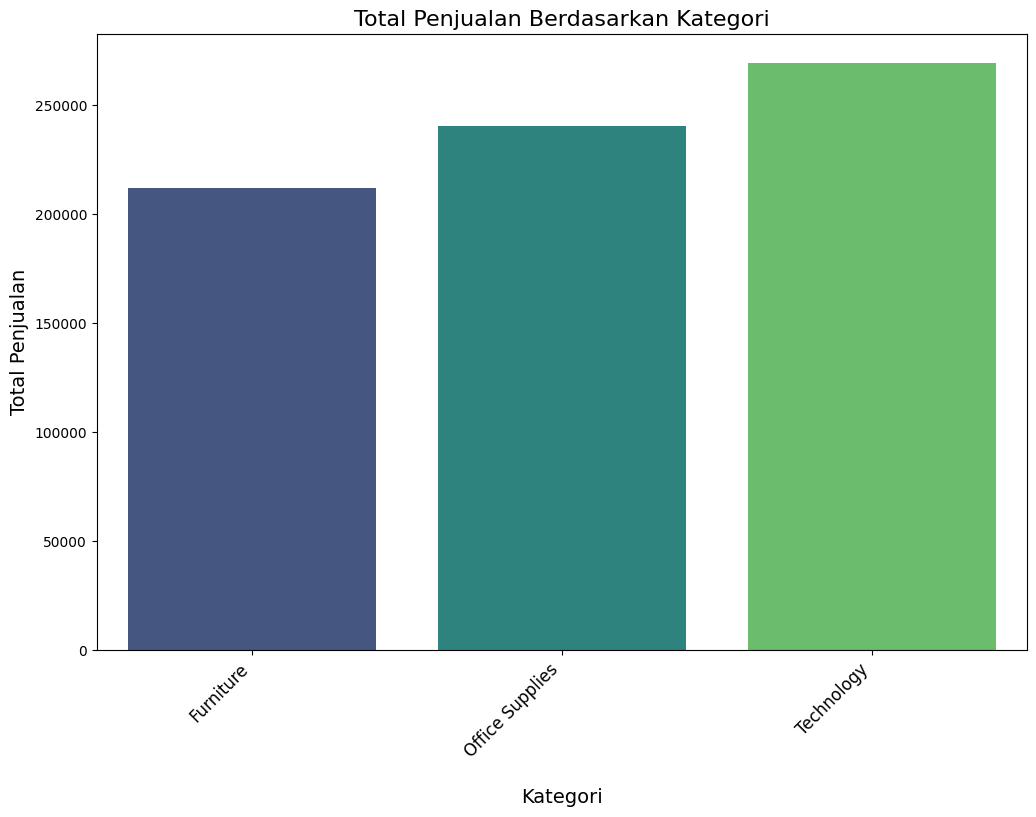

In [42]:


# Menghitung total penjualan berdasarkan kategori
total_sales_by_category = superstore_df_2018.groupby('Category')['Sales'].sum().reset_index()

# Membuat plot batang vertikal berdasarkan kategori
plt.figure(figsize=(12, 8))  # Ukuran lebar 12 inci dan tinggi 8 inci
sns.barplot(x='Category', y='Sales', data=total_sales_by_category, palette='viridis')

# Menambahkan judul dan label
plt.title('Total Penjualan Berdasarkan Kategori', fontsize=16)
plt.xlabel('Kategori', fontsize=14, labelpad=20)
plt.ylabel('Total Penjualan', fontsize=14)

# Menyesuaikan layout untuk memberi ruang lebih pada sumbu X
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan plot
plt.show()


<ipython-input-43-c3889baea8b6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  office_supplies_sales_2018_df = superstore_df_2018[superstore_df['Category'] == 'Office Supplies'].groupby('Sub-Category')['Sales'].sum().reset_index()
<ipython-input-43-c3889baea8b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=furniture_sales_2018_df, palette='Blues')


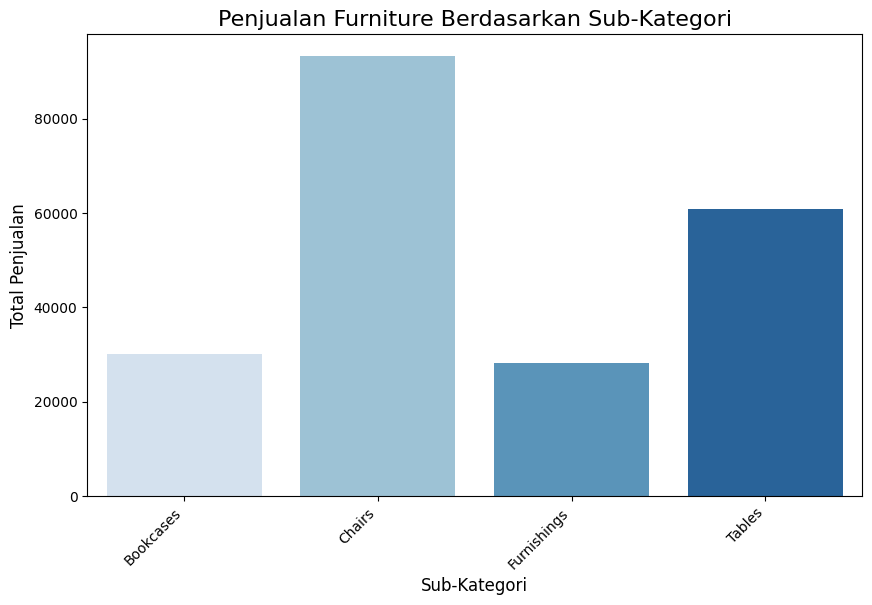

<ipython-input-43-c3889baea8b6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=office_supplies_sales_2018_df, palette='Greens')


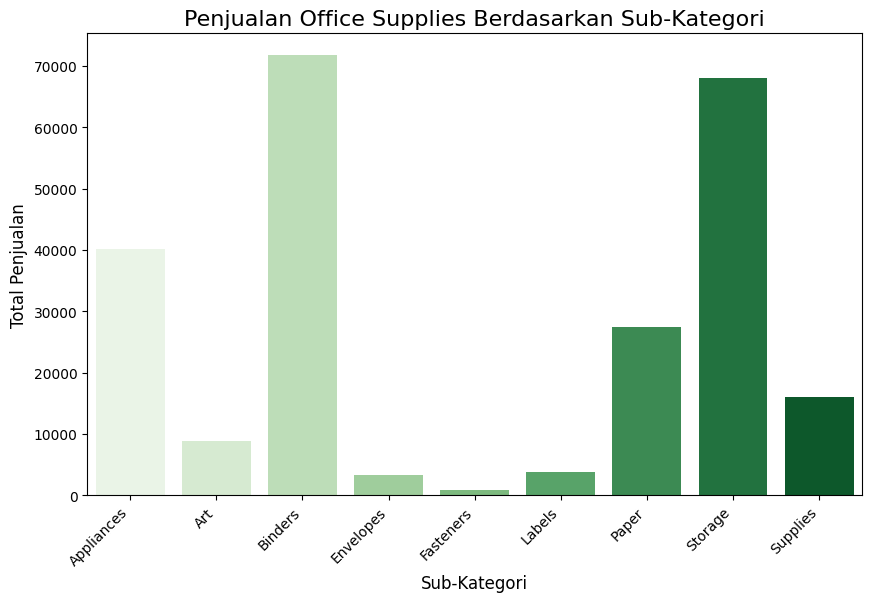

<ipython-input-43-c3889baea8b6>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=technology_sales_2018_df, palette='Oranges')


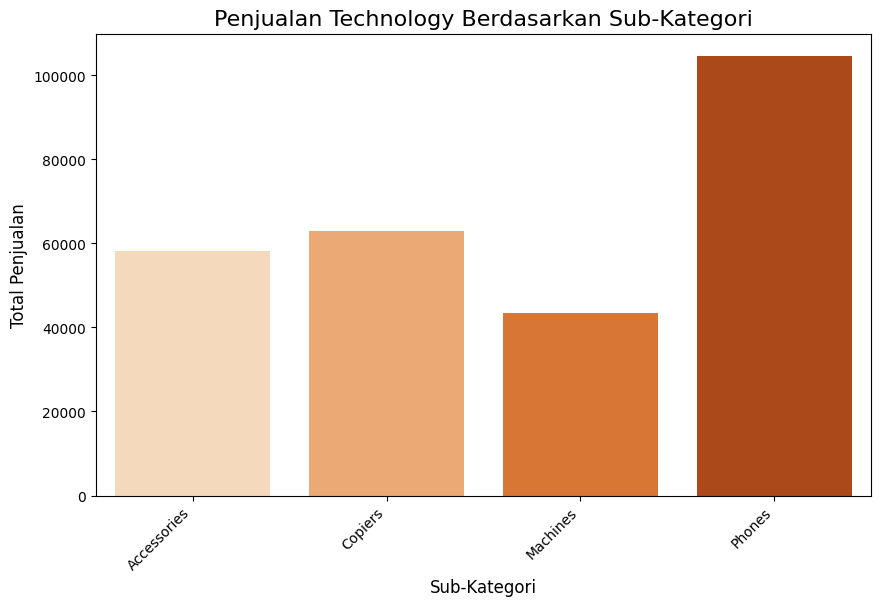

In [43]:
# DataFrame penjualan per sub-kategori untuk masing-masing kategori
furniture_sales_2018_df = superstore_df_2018[superstore_df_2018['Category'] == 'Furniture'].groupby('Sub-Category')['Sales'].sum().reset_index()
office_supplies_sales_2018_df = superstore_df_2018[superstore_df['Category'] == 'Office Supplies'].groupby('Sub-Category')['Sales'].sum().reset_index()
technology_sales_2018_df = superstore_df_2018[superstore_df_2018['Category'] == 'Technology'].groupby('Sub-Category')['Sales'].sum().reset_index()

# Membuat plot untuk penjualan per sub-kategori dalam kategori Furniture
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Sales', data=furniture_sales_2018_df, palette='Blues')
plt.title('Penjualan Furniture Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Sub-Kategori', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Membuat plot untuk penjualan per sub-kategori dalam kategori Office Supplies
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Sales', data=office_supplies_sales_2018_df, palette='Greens')
plt.title('Penjualan Office Supplies Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Sub-Kategori', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Membuat plot untuk penjualan per sub-kategori dalam kategori Technology
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Sales', data=technology_sales_2018_df, palette='Oranges')
plt.title('Penjualan Technology Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Sub-Kategori', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
all_sales_2018 = pd.concat([furniture_sales_2018, office_supplies_sales_2018, technology_sales_2018])

# Urutkan berdasarkan kolom 'Sales' secara menurun
sorted_sales_2018 = all_sales_2018.sort_values(by='Sales', ascending=False)

# Reset indeks tabel
sorted_sales_2018.reset_index(drop=True, inplace=True)

# Tampilkan tabel yang sudah diurutkan
print(sorted_sales_2018)

   Sub-Category        Sales
0        Phones  104685.6580
1        Chairs   93191.2730
2       Binders   71721.2550
3       Storage   68072.7020
4       Copiers   62899.3900
5        Tables   60893.5425
6   Accessories   58240.9700
7      Machines   43544.6750
8    Appliances   40212.7220
9     Bookcases   30024.2797
10  Furnishings   28204.6920
11        Paper   27504.7760
12     Supplies   15952.1100
13          Art    8825.6320
14       Labels    3844.6960
15    Envelopes    3378.5740
16    Fasteners     855.0740


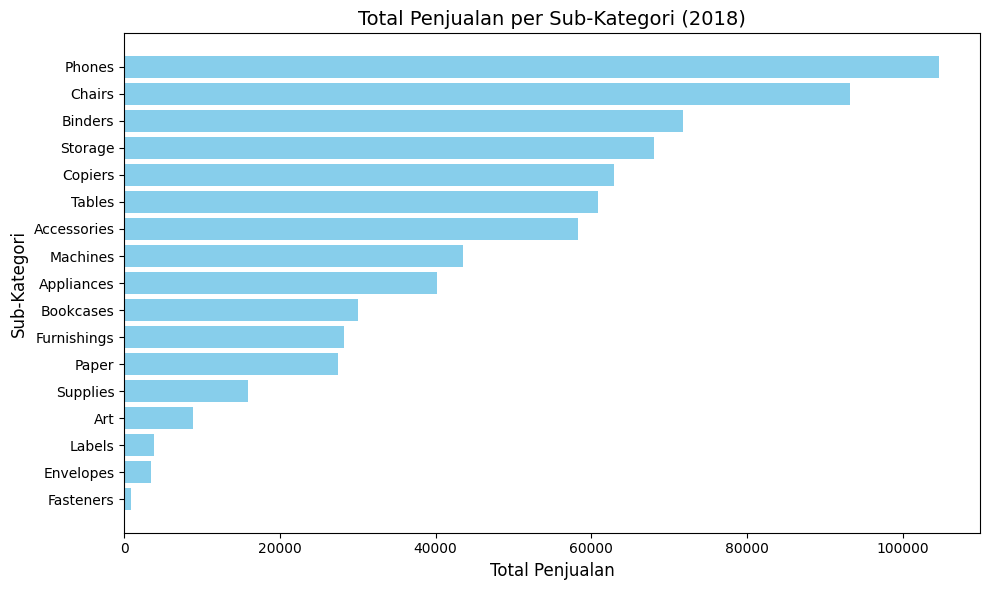

In [46]:
# Membuat data untuk sumbu x dan y
sub_categories = sorted_sales_2018['Sub-Category']
sales = sorted_sales_2018['Sales']

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(sub_categories, sales, color='skyblue')

# Menambahkan judul dan label
plt.title('Total Penjualan per Sub-Kategori (2018)', fontsize=14)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar penjualan tertinggi di atas

# Menampilkan plot
plt.tight_layout()
plt.show()

In [47]:
# Warna untuk setiap kategori
colors = {
    'Furniture': 'skyblue',
    'Office Supplies': 'lightgreen',
    'Technology': 'coral'
}

# Buat warna berdasarkan kategori
bar_colors = [colors[category] for category in sorted_sales_2018['Category']]

# Membuat data untuk sumbu x dan y
sub_categories = sorted_sales_2018['Sub-Category']
sales = sorted_sales_2018['Sales']

# Membuat diagram batang horizontal
plt.figure(figsize=(12, 8))
plt.barh(sub_categories, sales, color=bar_colors)

# Menambahkan judul dan label
plt.title('Total Penjualan per Sub-Kategori (2018)', fontsize=16)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar penjualan tertinggi di atas

# Menambahkan legenda
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[cat]) for cat in colors]
plt.legend(legend_labels, colors.keys(), title='Kategori', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

KeyError: 'Category'

In [49]:
# Mengelompokkan jumlah item berdasarkan sub-kategori
grouped_items = superstore_df_2018 .groupby('Sub-Category')['Quantity'].sum().reset_index()

# Mengurutkan hasil berdasarkan jumlah item
grouped_items = grouped_items.sort_values(by='Quantity', ascending=False)

# Menampilkan hasil
print(grouped_items)

KeyError: 'Column not found: Quantity'

In [50]:
print(sorted_sales_2018.columns)

Index(['Sub-Category', 'Sales'], dtype='object')


In [51]:
furniture_sales_2018['Category'] = 'Furniture'
office_supplies_sales_2018['Category'] = 'Office Supplies'
technology_sales_2018['Category'] = 'Technology'

In [52]:
all_sales_2018 = pd.concat([furniture_sales_2018, office_supplies_sales_2018, technology_sales_2018])

In [53]:
print(all_sales_2018.head())

  Sub-Category       Sales         Category
0    Bookcases  30024.2797        Furniture
1       Chairs  93191.2730        Furniture
2  Furnishings  28204.6920        Furniture
3       Tables  60893.5425        Furniture
0   Appliances  40212.7220  Office Supplies


Index(['Sub-Category', 'Sales', 'Category'], dtype='object')


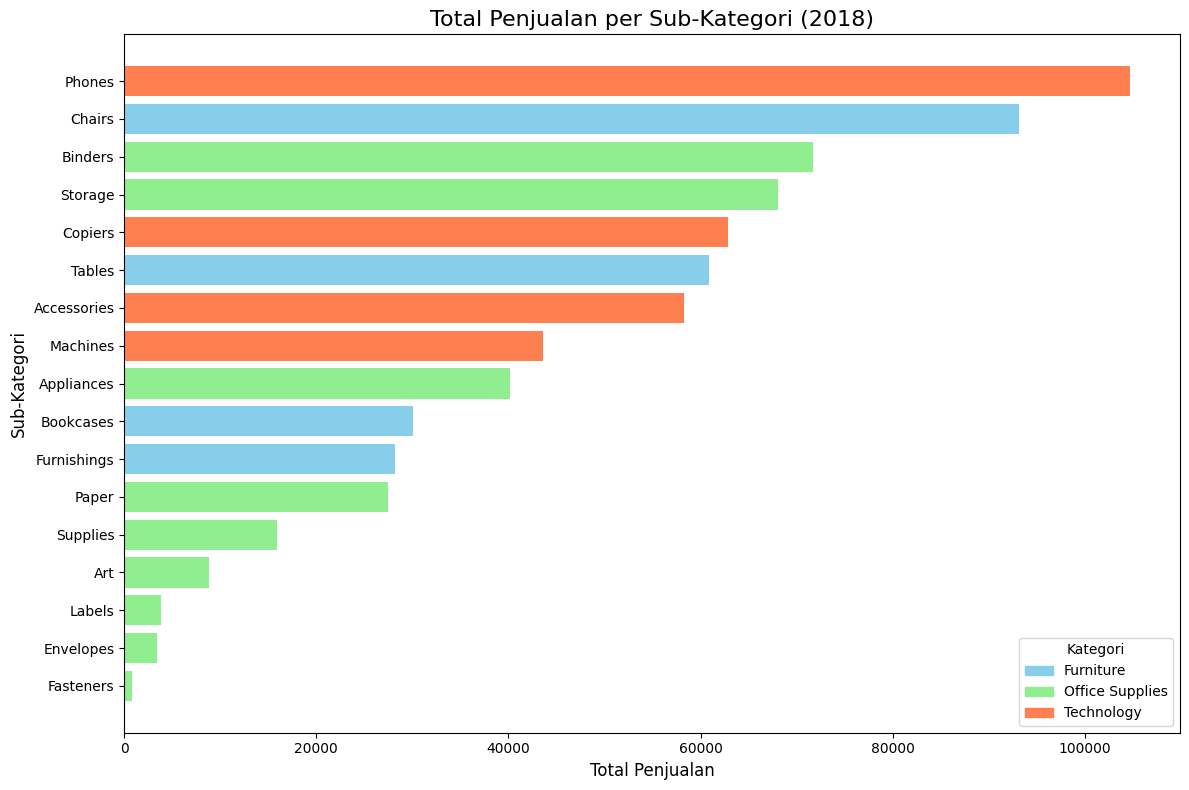

In [54]:
# Tambahkan kolom kategori ke setiap DataFrame
furniture_sales_2018['Category'] = 'Furniture'
office_supplies_sales_2018['Category'] = 'Office Supplies'
technology_sales_2018['Category'] = 'Technology'

# Gabungkan semua kategori ke dalam satu DataFrame
all_sales_2018 = pd.concat([furniture_sales_2018, office_supplies_sales_2018, technology_sales_2018])

# Pastikan kolom 'Category' ada
print(all_sales_2018.columns)

# Urutkan data berdasarkan penjualan
sorted_sales_2018 = all_sales_2018.sort_values(by='Sales', ascending=False)

# Buat warna berdasarkan kategori
colors = {
    'Furniture': 'skyblue',
    'Office Supplies': 'lightgreen',
    'Technology': 'coral'
}
bar_colors = [colors[category] for category in sorted_sales_2018['Category']]

# Plot bar chart horizontal
plt.figure(figsize=(12, 8))
plt.barh(sorted_sales_2018['Sub-Category'], sorted_sales_2018['Sales'], color=bar_colors)
plt.title('Total Penjualan per Sub-Kategori (2018)', fontsize=16)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)
plt.gca().invert_yaxis()

# Tambahkan legenda
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[cat]) for cat in colors]
plt.legend(legend_labels, colors.keys(), title='Kategori', fontsize=10)

plt.tight_layout()
plt.show()

In [76]:
# Mengelompokkan data berdasarkan kategori dan menghitung frekuensi kemunculan
grouped_by_category = superstore_df.groupby('Category').size().reset_index(name='Count')

# Mengurutkan hasil berdasarkan jumlah item
grouped_by_category = grouped_by_category.sort_values(by='Count', ascending=False)

# Menampilkan hasil
print(grouped_by_category)



          Category  Count
1  Office Supplies   5909
0        Furniture   2078
2       Technology   1813


In [79]:
# Membuat data untuk visualisasi
categories = grouped_by_category ['Category']
counts = grouped_by_category['Count']

# Membuat diagram batang horizontal
plt.figure(figsize=(8, 6))
plt.barh(categories, counts, color=['lightcoral', 'lightgreen', 'skyblue'])

# Menambahkan judul dan label
plt.title('Jumlah Item Dijual Berdasarkan Kategori', fontsize=16)
plt.xlabel('Jumlah Item (Count)', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kategori dengan count terbanyak di atas

# Menampilkan plot
plt.tight_layout()
plt.show()


KeyError: 'Category'

In [81]:
print(superstore_df_2018.columns)

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [83]:
print(superstore_df_2018.head())

    Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
12      13  CA-2018-114412 2018-04-15 2018-04-20  Standard Class    AA-10480   
23      24  US-2018-156909 2018-07-16 2018-07-18    Second Class    SF-20065   
34      35  CA-2018-107727 2018-10-19 2018-10-23    Second Class    MA-17560   
41      42  CA-2018-120999 2018-09-10 2018-09-15  Standard Class    LC-16930   
43      44  CA-2018-139619 2018-09-19 2018-09-23  Standard Class    ES-14080   

      Customer_Name      Segment        Country          City           State  \
12     Andrew Allen     Consumer  United States       Concord  North Carolina   
23  Sandra Flanagan     Consumer  United States  Philadelphia    Pennsylvania   
34     Matt Abelman  Home Office  United States       Houston           Texas   
41   Linda Cazamias    Corporate  United States    Naperville        Illinois   
43       Erin Smith    Corporate  United States     Melbourne         Florida   

    Postal_Code   Region       P

In [106]:
grouped_by_category = superstore_df_2018.groupby('Category').size().reset_index(name='Count')


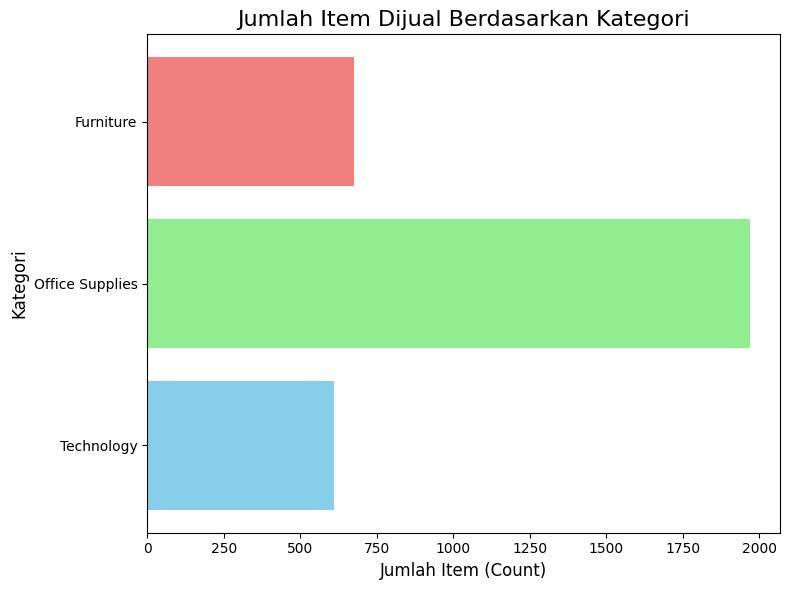

In [107]:
# Membuat data untuk visualisasi
categories = grouped_by_category ['Category']
counts = grouped_by_category['Count']

# Membuat diagram batang horizontal
plt.figure(figsize=(8, 6))
plt.barh(categories, counts, color=['lightcoral', 'lightgreen', 'skyblue'])

# Menambahkan judul dan label
plt.title('Jumlah Item Dijual Berdasarkan Kategori', fontsize=16)
plt.xlabel('Jumlah Item (Count)', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar kategori dengan count terbanyak di atas

# Menampilkan plot
plt.tight_layout()

In [97]:
# Mengelompokkan data berdasarkan kategori dan menghitung frekuensi kemunculan
grouped_by_category = superstore_df_2018.groupby('Sub-Category').size().reset_index(name='Count')

# Mengurutkan hasil berdasarkan jumlah item
grouped_by_category = grouped_by_category.sort_values(by='Count', ascending=False)

# Menampilkan hasil
print(grouped_by_category)


   Sub-Category  Count
3       Binders    492
12        Paper    452
9   Furnishings    310
13       Phones    290
14      Storage    281
2           Art    279
0   Accessories    266
5        Chairs    187
1    Appliances    161
10       Labels    113
16       Tables    104
4     Bookcases     76
7     Envelopes     71
8     Fasteners     63
15     Supplies     58
11     Machines     33
6       Copiers     22


In [98]:
print(superstore_df.columns)


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [100]:
print(superstore_df_2018.head())


    Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
12      13  CA-2018-114412 2018-04-15 2018-04-20  Standard Class    AA-10480   
23      24  US-2018-156909 2018-07-16 2018-07-18    Second Class    SF-20065   
34      35  CA-2018-107727 2018-10-19 2018-10-23    Second Class    MA-17560   
41      42  CA-2018-120999 2018-09-10 2018-09-15  Standard Class    LC-16930   
43      44  CA-2018-139619 2018-09-19 2018-09-23  Standard Class    ES-14080   

      Customer_Name      Segment        Country          City           State  \
12     Andrew Allen     Consumer  United States       Concord  North Carolina   
23  Sandra Flanagan     Consumer  United States  Philadelphia    Pennsylvania   
34     Matt Abelman  Home Office  United States       Houston           Texas   
41   Linda Cazamias    Corporate  United States    Naperville        Illinois   
43       Erin Smith    Corporate  United States     Melbourne         Florida   

    Postal_Code   Region       P

In [101]:

grouped_by_category = superstore_df_2018.groupby('Sub-Category').size().reset_index(name='Count')


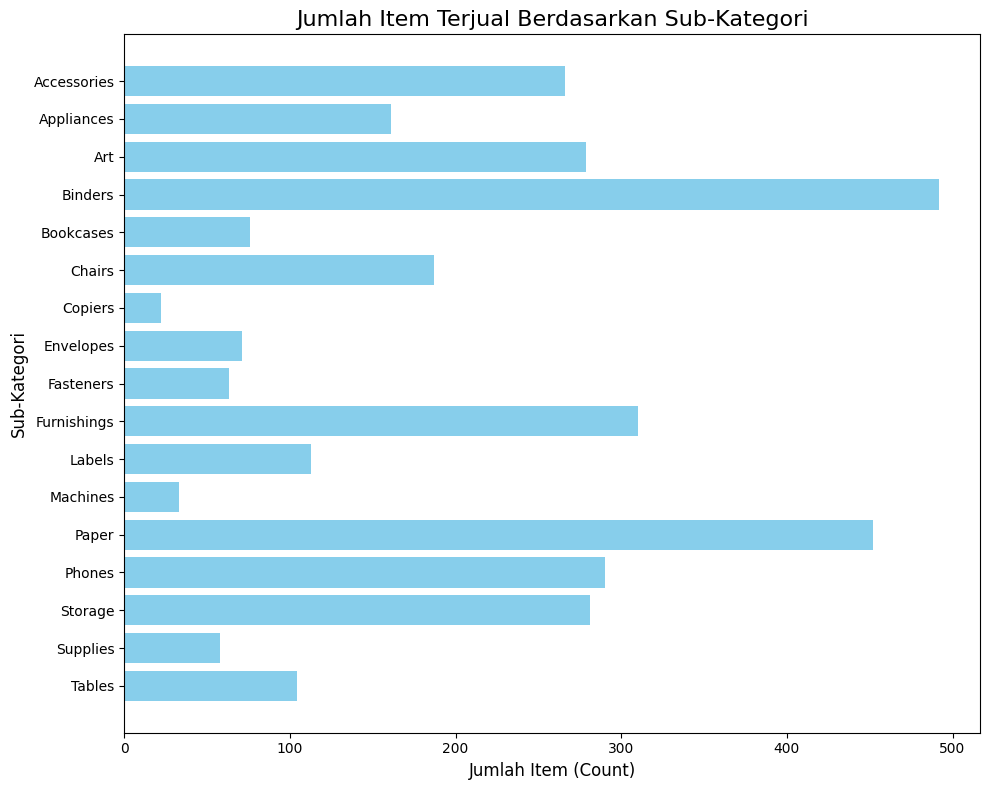

In [102]:
# Data dari hasil pengelompokan
sub_categories = grouped_by_category['Sub-Category']  # Nama sub-kategori
counts = grouped_by_category['Count']                # Jumlah item

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(sub_categories, counts, color='skyblue')

# Menambahkan judul dan label
plt.title('Jumlah Item Terjual Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Jumlah Item (Count)', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)

# Membalikkan sumbu y agar sub-kategori dengan jumlah tertinggi berada di atas
plt.gca().invert_yaxis()

# Menampilkan diagram
plt.tight_layout()
plt.show()

In [103]:
print(superstore_df_2018.columns)


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')


In [104]:
# Mengelompokkan data dengan kategori
grouped_by_category = superstore_df.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

# Menampilkan hasil
print(grouped_by_category.head())


          Category Sub-Category  Count
0        Furniture    Bookcases    226
1        Furniture       Chairs    607
2        Furniture  Furnishings    931
3        Furniture       Tables    314
4  Office Supplies   Appliances    459


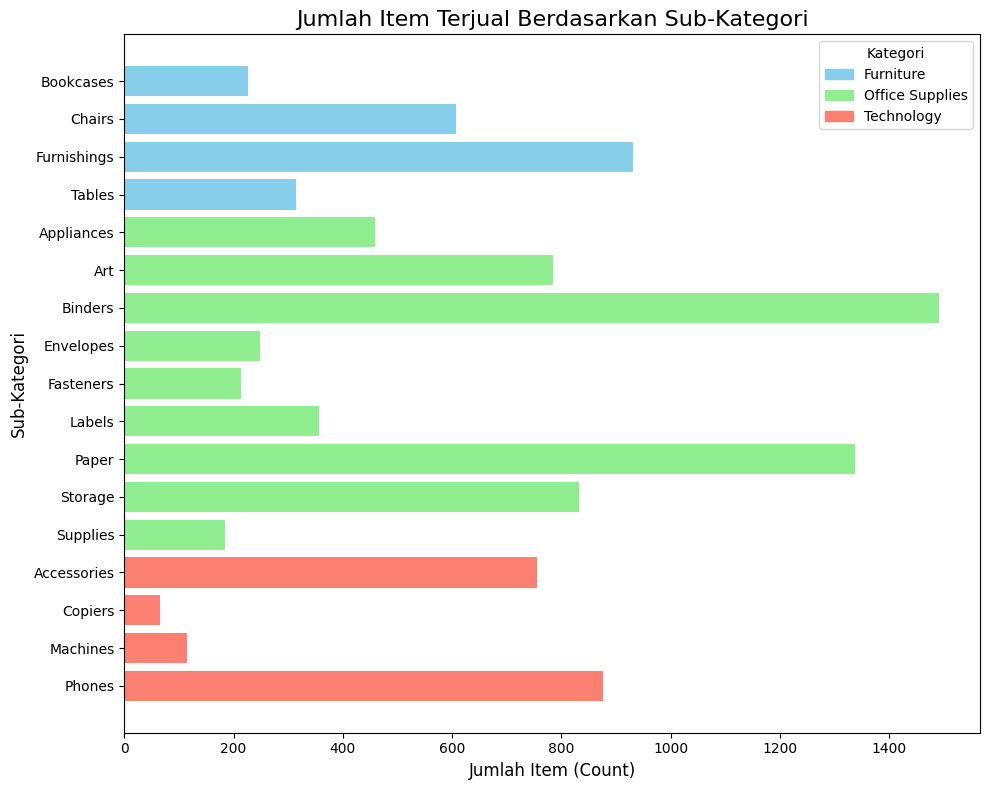

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan grouped_by_category memiliki kolom kategori
# grouped_by_category = grouped_by_category[['Category', 'Sub-Category', 'Count']]

# Warna untuk setiap kategori
category_colors = {
    'Furniture': 'skyblue',
    'Office Supplies': 'lightgreen',
    'Technology': 'salmon'
}

# Menentukan warna berdasarkan kategori
colors = grouped_by_category['Category'].map(category_colors)

# Data untuk visualisasi
sub_categories = grouped_by_category['Sub-Category']
counts = grouped_by_category['Count']

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(sub_categories, counts, color=colors)

# Menambahkan judul dan label
plt.title('Jumlah Item Terjual Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Jumlah Item (Count)', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)

# Membalikkan sumbu y agar sub-kategori dengan jumlah tertinggi berada di atas
plt.gca().invert_yaxis()

# Membuat legenda berdasarkan kategori
handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[cat]) for cat in category_colors]
labels = category_colors.keys()
plt.legend(handles, labels, title='Kategori', fontsize=10)

# Menampilkan diagram
plt.tight_layout()
plt.show()

In [108]:
grouped_by_category = grouped_by_category.sort_values(by='Count', ascending=False)


In [110]:
print(grouped_by_category.columns)


Index(['Category', 'Count'], dtype='object')


In [111]:
# Mengelompokkan berdasarkan kategori dan sub-kategori
grouped_by_category = superstore_df.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

# Mengurutkan berdasarkan Count
grouped_by_category = grouped_by_category.sort_values(by='Count', ascending=False)


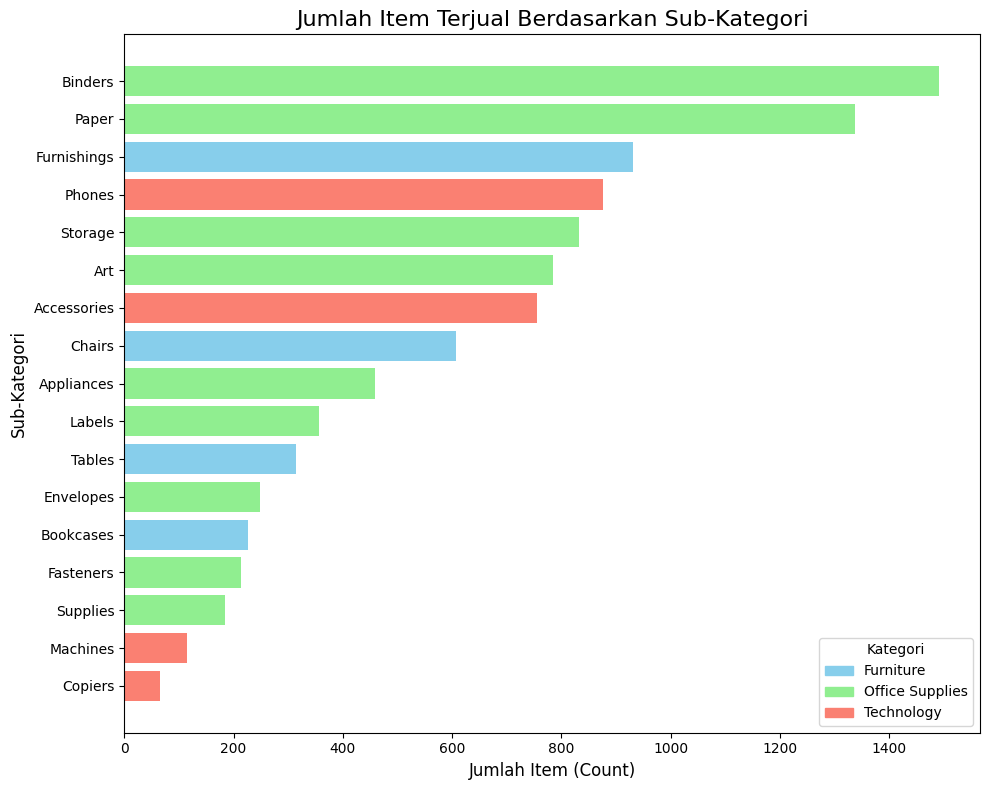

In [112]:
# Mengurutkan grouped_by_category berdasarkan Count
grouped_by_category = grouped_by_category.sort_values(by='Count', ascending=False)

# Warna untuk setiap kategori
category_colors = {
    'Furniture': 'skyblue',
    'Office Supplies': 'lightgreen',
    'Technology': 'salmon'
}

# Menentukan warna berdasarkan kategori
colors = grouped_by_category['Category'].map(category_colors)

# Data untuk visualisasi
sub_categories = grouped_by_category['Sub-Category']
counts = grouped_by_category['Count']

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 8))
plt.barh(sub_categories, counts, color=colors)

# Menambahkan judul dan label
plt.title('Jumlah Item Terjual Berdasarkan Sub-Kategori', fontsize=16)
plt.xlabel('Jumlah Item (Count)', fontsize=12)
plt.ylabel('Sub-Kategori', fontsize=12)

# Membalikkan sumbu y agar sub-kategori dengan jumlah tertinggi berada di atas
plt.gca().invert_yaxis()

# Membuat legenda berdasarkan kategori
handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[cat]) for cat in category_colors]
labels = category_colors.keys()
plt.legend(handles, labels, title='Kategori', fontsize=10)

# Menampilkan diagram
plt.tight_layout()
plt.show()


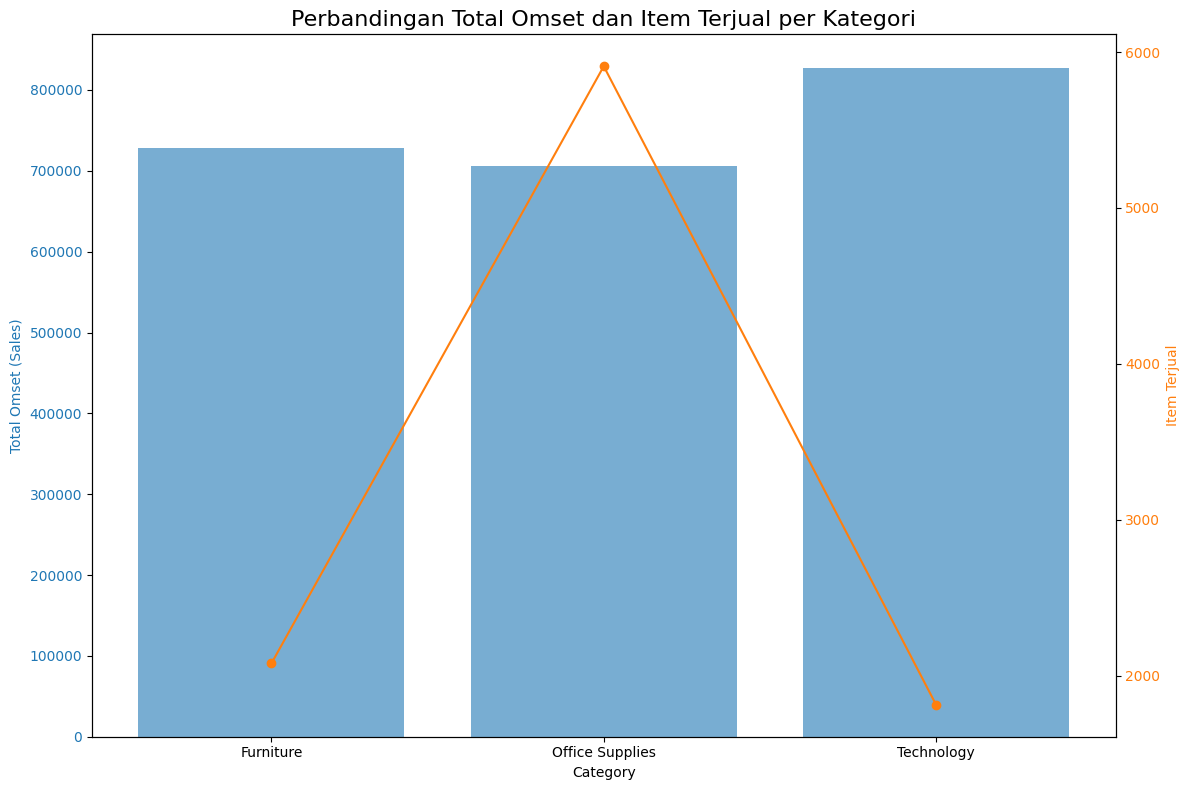

In [113]:
# Menghitung total omset per kategori
total_omset = superstore_df.groupby('Category')['Sales'].sum().reset_index(name='Total Sales')

# Menghitung jumlah item terjual per kategori
item_terjual = superstore_df.groupby('Category').size().reset_index(name='Item Sold')

# Menggabungkan data omset dan jumlah item terjual berdasarkan kategori
category_sales = pd.merge(total_omset, item_terjual, on='Category')

# Membuat diagram dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(12, 8))

# Sumbu pertama untuk Total Omset
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Omset (Sales)', color='tab:blue')
ax1.bar(category_sales['Category'], category_sales['Total Sales'], color='tab:blue', alpha=0.6, label='Total Omset')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Sumbu kedua untuk Item Terjual
ax2 = ax1.twinx()  # Membuat sumbu y kedua
ax2.set_ylabel('Item Terjual', color='tab:orange')
ax2.plot(category_sales['Category'], category_sales['Item Sold'], color='tab:orange', marker='o', label='Item Terjual')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Menambahkan judul
plt.title('Perbandingan Total Omset dan Item Terjual per Kategori', fontsize=16)

# Menampilkan diagram
plt.tight_layout()
plt.show()

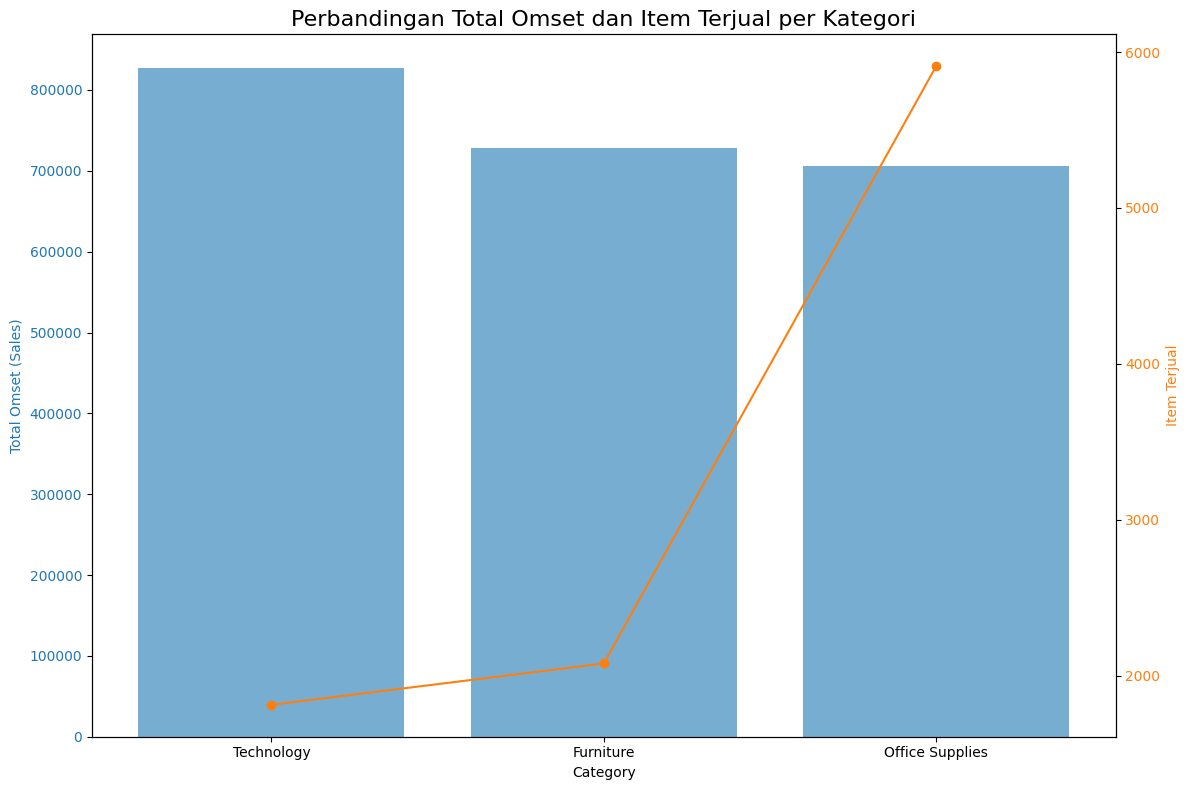

In [114]:
# Menghitung total omset per kategori
total_omset = superstore_df.groupby('Category')['Sales'].sum().reset_index(name='Total Sales')

# Menghitung jumlah item terjual per kategori
item_terjual = superstore_df.groupby('Category').size().reset_index(name='Item Sold')

# Menggabungkan data omset dan jumlah item terjual berdasarkan kategori
category_sales = pd.merge(total_omset, item_terjual, on='Category')

# Urutkan berdasarkan total omset dari tertinggi ke terendah
category_sales_sorted = category_sales.sort_values(by='Total Sales', ascending=False)

# Membuat diagram dengan dua sumbu y
fig, ax1 = plt.subplots(figsize=(12, 8))

# Sumbu pertama untuk Total Omset
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Omset (Sales)', color='tab:blue')
ax1.bar(category_sales_sorted['Category'], category_sales_sorted['Total Sales'], color='tab:blue', alpha=0.6, label='Total Omset')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Sumbu kedua untuk Item Terjual
ax2 = ax1.twinx()  # Membuat sumbu y kedua
ax2.set_ylabel('Item Terjual', color='tab:orange')
ax2.plot(category_sales_sorted['Category'], category_sales_sorted['Item Sold'], color='tab:orange', marker='o', label='Item Terjual')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Menambahkan judul
plt.title('Perbandingan Total Omset dan Item Terjual per Kategori', fontsize=16)

# Menampilkan diagram
plt.tight_layout()
plt.show()

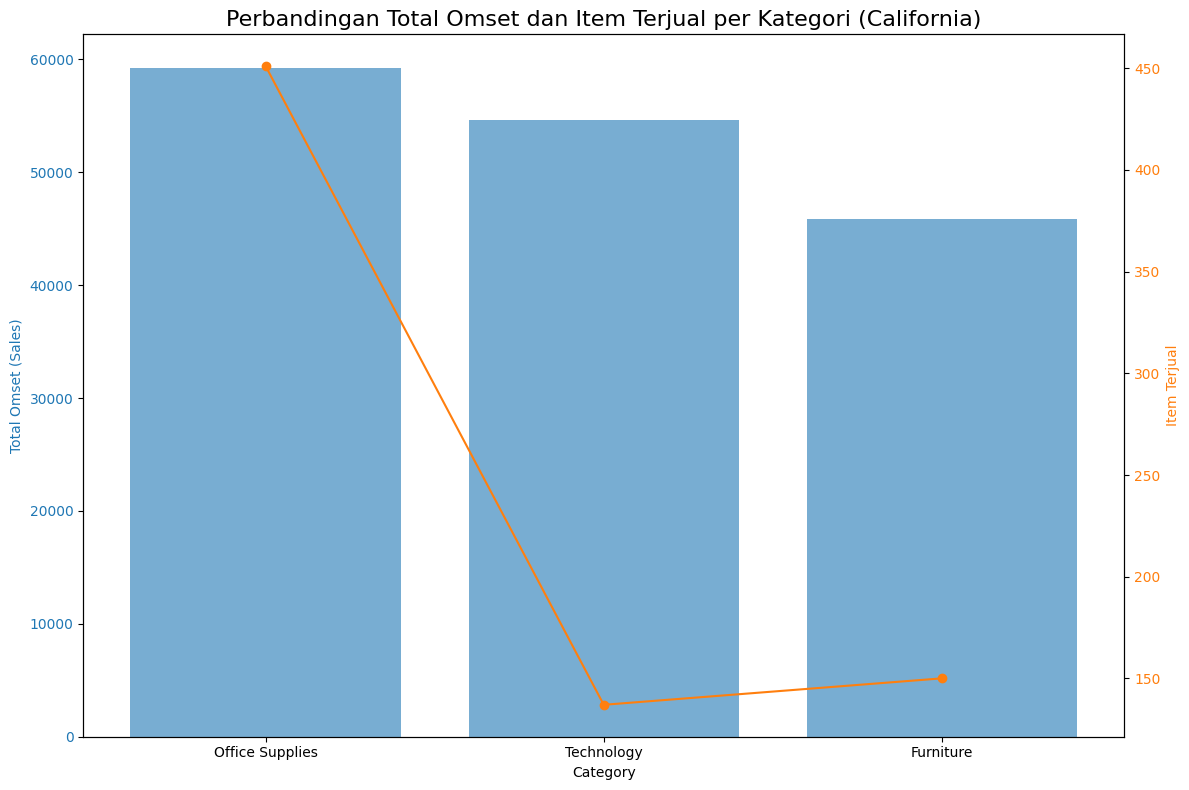

In [125]:
# prompt: buat pembandingan di atas khusus untuk kota california

# Filter data untuk kota di California
california_df = superstore_df_2018[superstore_df_2018['City'].isin(superstore_df_2018[superstore_df_2018['State'] == 'California']['City'].unique())]

# Menghitung total omset per kategori di California
total_omset_ca = california_df.groupby('Category')['Sales'].sum().reset_index(name='Total Sales')

# Menghitung jumlah item terjual per kategori di California
item_terjual_ca = california_df.groupby('Category').size().reset_index(name='Item Sold')

# Menggabungkan data omset dan jumlah item terjual berdasarkan kategori di California
category_sales_ca = pd.merge(total_omset_ca, item_terjual_ca, on='Category')

# Urutkan berdasarkan total omset dari tertinggi ke terendah di California
category_sales_ca_sorted = category_sales_ca.sort_values(by='Total Sales', ascending=False)

# Membuat diagram dengan dua sumbu y untuk California
fig, ax1 = plt.subplots(figsize=(12, 8))

# Sumbu pertama untuk Total Omset di California
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Omset (Sales)', color='tab:blue')
ax1.bar(category_sales_ca_sorted['Category'], category_sales_ca_sorted['Total Sales'], color='tab:blue', alpha=0.6, label='Total Omset')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Sumbu kedua untuk Item Terjual di California
ax2 = ax1.twinx()  # Membuat sumbu y kedua
ax2.set_ylabel('Item Terjual', color='tab:orange')
ax2.plot(category_sales_ca_sorted['Category'], category_sales_ca_sorted['Item Sold'], color='tab:orange', marker='o', label='Item Terjual')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Menambahkan judul untuk California
plt.title('Perbandingan Total Omset dan Item Terjual per Kategori (California)', fontsize=16)

# Menampilkan diagram untuk California
plt.tight_layout()
plt.show()

# Berdasarkan Wilayah & Segmen

In [55]:
superstore_df_2018.Country.value_counts()

,count
Country,
United States,3258


In [56]:
superstore_df_2018.City.value_counts()

,count
City,
New York City,303
Los Angeles,207
San Francisco,187
Seattle,182
Philadelphia,182
...,...
Escondido,1
Vancouver,1
Chapel Hill,1


In [57]:
perjualan_segmen_2018= superstore_df_2018.groupby(['Category', 'Sub-Category', 'Segment'])['Sales'].sum()
print(perjualan_segmen_2018)


Category         Sub-Category  Segment    
Furniture        Bookcases     Consumer       18305.6289
                               Corporate       8551.4374
                               Home Office     3167.2134
                 Chairs        Consumer       50179.7810
                               Corporate      26442.5610
                               Home Office    16568.9310
                 Furnishings   Consumer       13439.3040
                               Corporate       8010.2220
                               Home Office     6755.1660
                 Tables        Consumer       27675.6720
                               Corporate      15766.9840
                               Home Office    17450.8865
Office Supplies  Appliances    Consumer       21615.1400
                               Corporate      15844.4280
                               Home Office     2753.1540
                 Art           Consumer        4801.3640
                               Corporate     

In [58]:
penjualan_segmen_2018 = superstore_df_2018.groupby('Segment')['Sales'].sum().reset_index()

# Menampilkan DataFrame penjualan_segmen
print(penjualan_segmen_2018)

       Segment        Sales
0     Consumer  328604.4719
1    Corporate  236043.6624
2  Home Office  157403.8869


In [59]:
penjualan_kota_2018 = superstore_df_2018.groupby('City')['Sales'].sum().reset_index()

# Menampilkan DataFrame penjualan_kota
print(penjualan_kota_2018)

            City     Sales
0       Aberdeen    25.500
1        Abilene     1.392
2          Akron  1327.300
3    Albuquerque  1604.668
4     Alexandria    25.060
..           ...       ...
343    Woodstock     2.912
344   Woonsocket    91.140
345      Yonkers   775.210
346         York   103.480
347         Yuma   599.985

[348 rows x 2 columns]


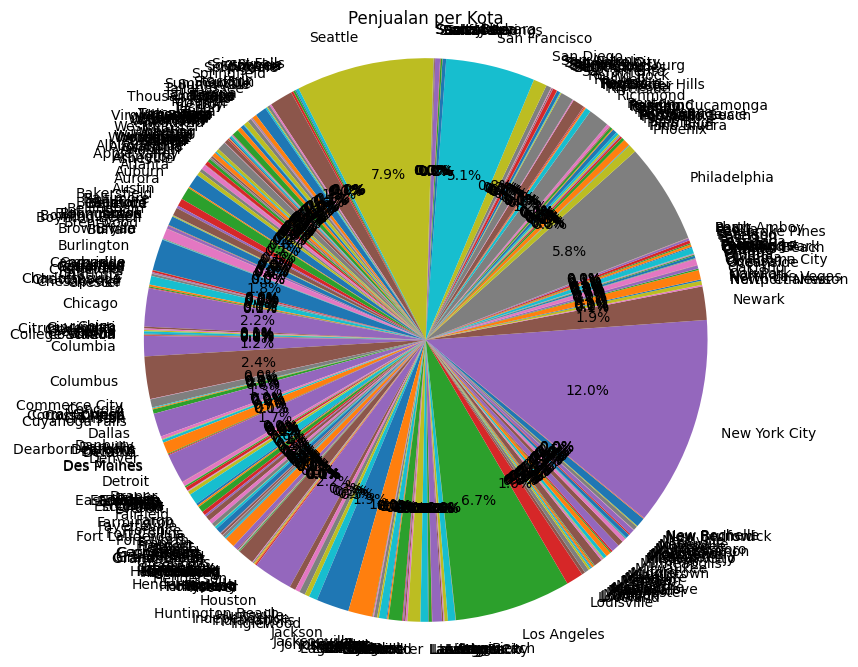

In [60]:
plt.figure(figsize=(8, 8))  # Ukuran gambar
plt.pie(penjualan_kota_2018['Sales'], labels=penjualan_kota_2018['City'], autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Penjualan per Kota')

# Menampilkan chart
plt.axis('equal')  # Membuat pie chart menjadi lingkaran sempurna
plt.show()

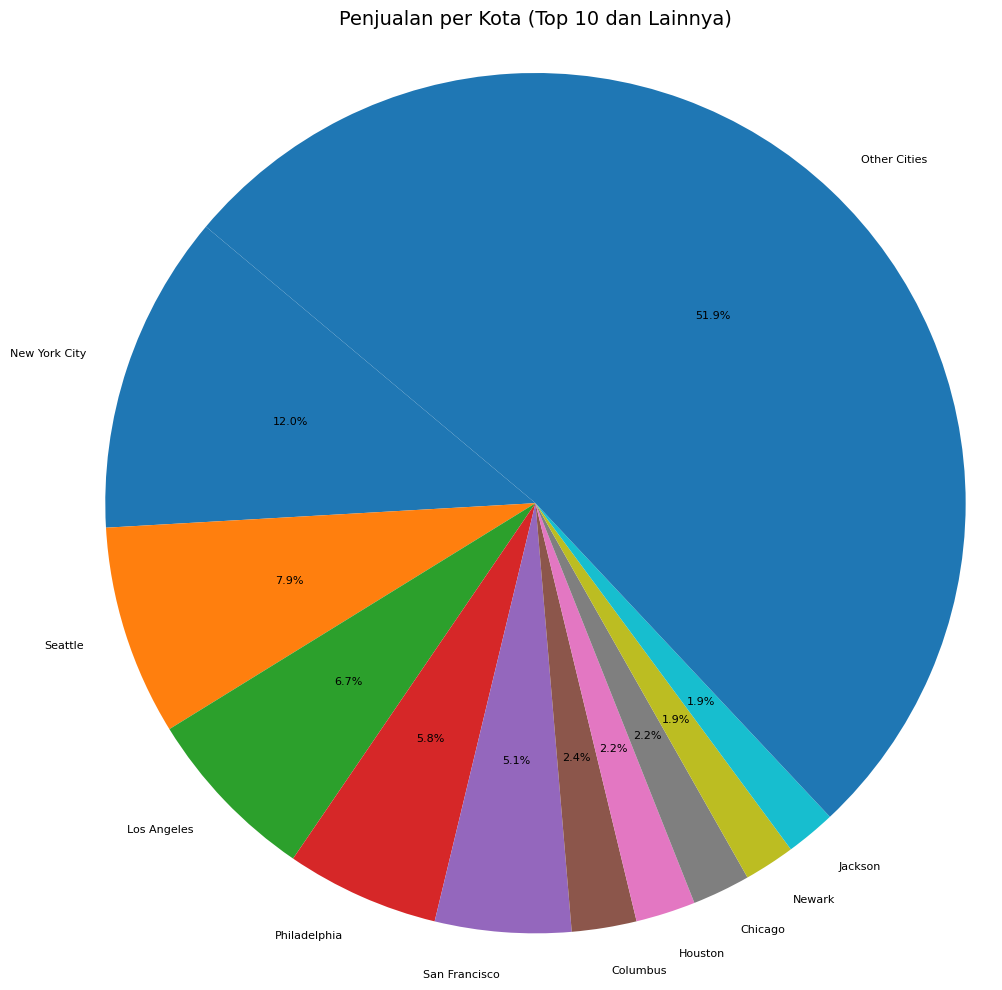

In [64]:
# prompt: buatkan agar pie chart efektif untuk dibaca

import matplotlib.pyplot as plt

# ... (your existing code)

# Assuming 'penjualan_kota_2018' DataFrame is already created

# Sort the data by sales in descending order
penjualan_kota_2018_sorted = penjualan_kota_2018.sort_values(by='Sales', ascending=False)

# Select top N cities for the pie chart (e.g., top 10)
top_n = 10
penjualan_kota_top_n = penjualan_kota_2018_sorted.head(top_n)

# Calculate the sum of sales for the remaining cities
other_cities_sales = penjualan_kota_2018_sorted['Sales'][top_n:].sum()

# Create a new row for 'Other Cities'
other_cities_row = pd.DataFrame({'City': ['Other Cities'], 'Sales': [other_cities_sales]})

# Concatenate the top N cities with the 'Other Cities' row
penjualan_kota_final = pd.concat([penjualan_kota_top_n, other_cities_row], ignore_index=True)


# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size for better readability
plt.pie(penjualan_kota_final['Sales'], labels=penjualan_kota_final['City'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}) # Adjust fontsize

# Add title and improve layout
plt.title('Penjualan per Kota (Top ' + str(top_n) + ' dan Lainnya)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

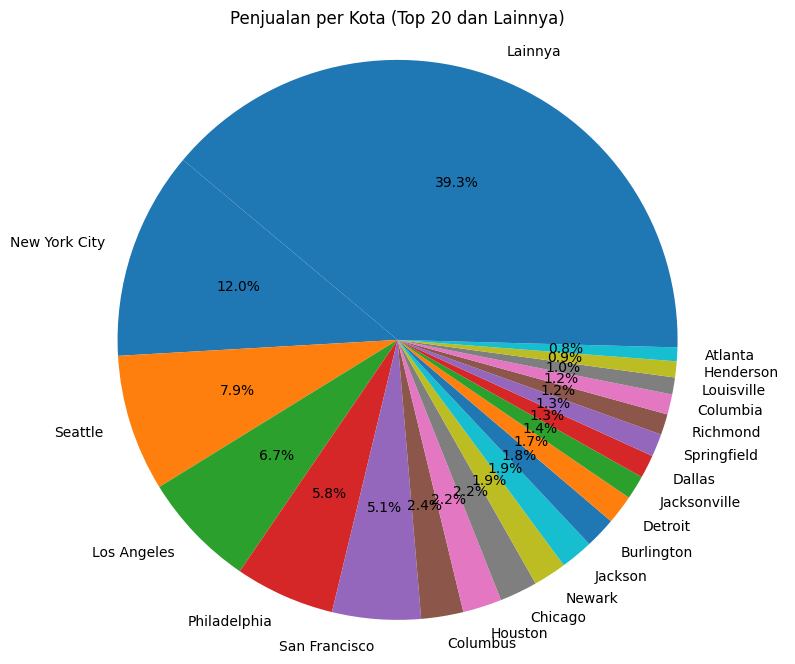

In [65]:
# Urutkan berdasarkan penjualan
penjualan_kota_2018 = penjualan_kota_2018.sort_values(by='Sales', ascending=False)

# Ambil 20 kota dengan penjualan tertinggi
top_20 = penjualan_kota_2018[:20]

# Hitung total penjualan untuk kota lainnya
other_sales = penjualan_kota_2018[20:]['Sales'].sum()

# Tambahkan kategori "Lainnya" ke dalam DataFrame menggunakan pd.concat
lainnya = pd.DataFrame({'City': ['Lainnya'], 'Sales': [other_sales]})
top_20 = pd.concat([top_20, lainnya], ignore_index=True)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_20['Sales'], labels=top_20['City'], autopct='%1.1f%%', startangle=140)

# Judul
plt.title('Penjualan per Kota (Top 20 dan Lainnya)')

# Menampilkan pie chart
plt.axis('equal')  # Lingkaran sempurna
plt.show()

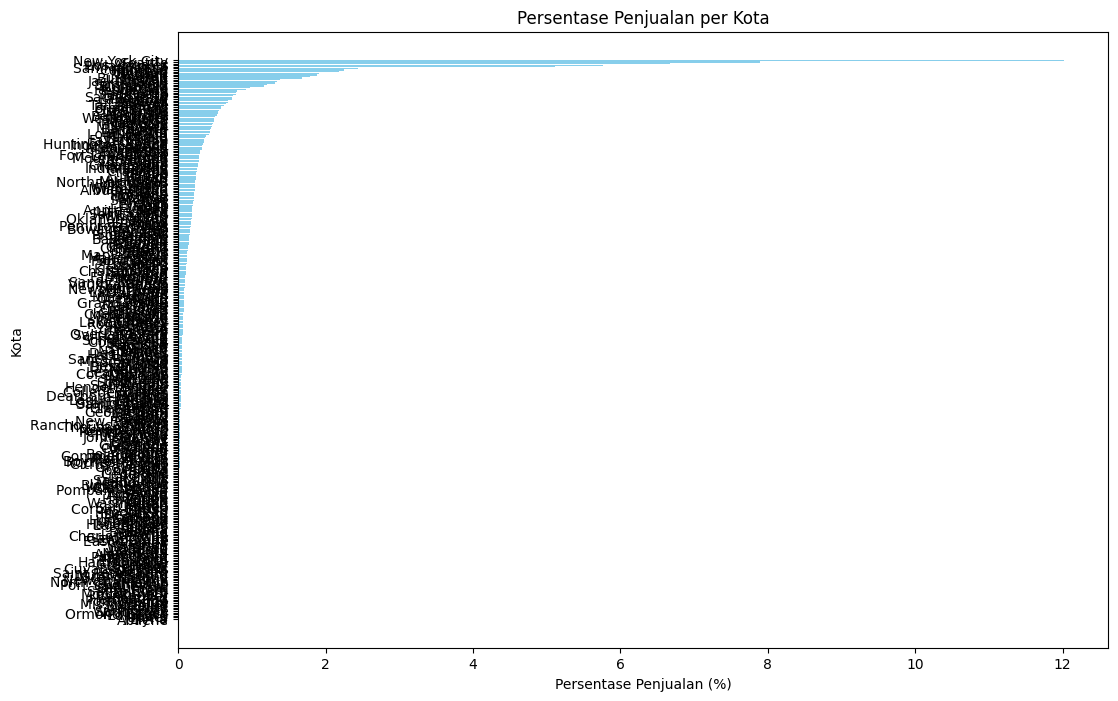

In [66]:
# Hitung persentase kontribusi penjualan setiap kota
penjualan_kota_2018['Percentage'] = (penjualan_kota_2018['Sales'] / penjualan_kota_2018['Sales'].sum()) * 100

# Urutkan berdasarkan persentase
penjualan_kota_2018= penjualan_kota_2018.sort_values(by='Percentage', ascending=False)

# Plot bar chart horizontal
plt.figure(figsize=(12, 8))
plt.barh(penjualan_kota_2018['City'], penjualan_kota_2018['Percentage'], color='skyblue')
plt.xlabel('Persentase Penjualan (%)')
plt.ylabel('Kota')
plt.title('Persentase Penjualan per Kota')
plt.gca().invert_yaxis()  # Membalik urutan kota agar yang tertinggi di atas
plt.show()

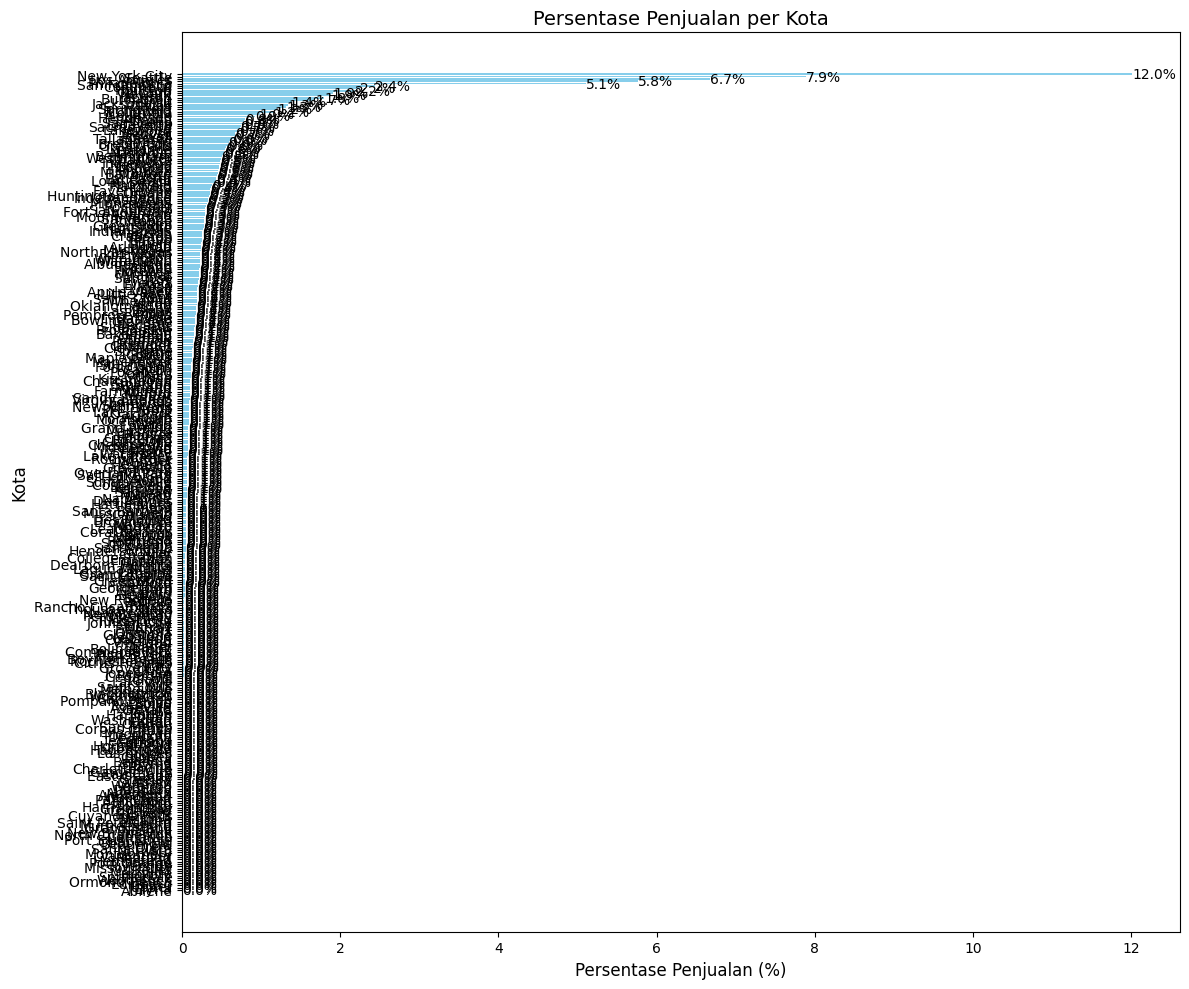

In [68]:
# buatkan agar bar chart horizontal dapat dibaca
# Assuming 'penjualan_kota_2018' DataFrame is already created and sorted by sales
# Plot bar chart horizontal with improved readability
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
plt.barh(penjualan_kota_2018['City'], penjualan_kota_2018['Percentage'], color='skyblue')
plt.xlabel('Persentase Penjualan (%)', fontsize=12)  # Increased fontsize
plt.ylabel('Kota', fontsize=12)  # Increased fontsize
plt.title('Persentase Penjualan per Kota', fontsize=14)  # Increased fontsize
plt.gca().invert_yaxis()  # Membalik urutan kota agar yang tertinggi di atas

# Add value labels to each bar
for index, value in enumerate(penjualan_kota_2018['Percentage']):
    plt.text(value, index, f'{value:.1f}%', va='center', ha='left', fontsize=10) # Added value labels

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [69]:
# Membuat DataFrame yang mengelompokkan penjualan berdasarkan State dan City
penjualan_state_kota_2018 = superstore_df_2018.groupby(['State', 'City'])['Sales'].sum().reset_index()

# Tampilkan hasil
print(penjualan_state_kota_2018)

         State        City    Sales
0      Alabama      Auburn     3.76
1      Alabama     Decatur   254.86
2      Alabama    Florence    12.48
3      Alabama      Hoover   525.85
4      Alabama  Huntsville   845.44
..         ...         ...      ...
403  Wisconsin    Franklin     3.60
404  Wisconsin   Green Bay    22.72
405  Wisconsin     Kenosha   399.95
406  Wisconsin     Madison  1816.36
407  Wisconsin   Milwaukee  3292.28

[408 rows x 3 columns]


In [70]:
# Grouping data berdasarkan 'State' dan menghitung total penjualan
total_sales_by_state_2018 = superstore_df_2018.groupby('State')['Sales'].sum().reset_index()

# Mengurutkan data berdasarkan total penjualan secara menurun
total_sales_by_state_2018 = total_sales_by_state_2018.sort_values(by='Sales', ascending=False)

# Menampilkan hasil
print(total_sales_by_state_2018)


                   State        Sales
3             California  144666.7685
29              New York   93772.1690
44            Washington   65539.8960
40                 Texas   43421.7582
35          Pennsylvania   42688.3060
8                Florida   26444.7155
19              Michigan   25833.6490
11              Illinois   23848.0430
30        North Carolina   23019.6290
32                  Ohio   21372.7600
9                Georgia   18873.9300
39             Tennessee   16113.8230
15              Kentucky   15516.8400
6               Delaware   13754.9830
12               Indiana   13685.4300
1                Arizona   11124.1930
4               Colorado   10033.2930
17              Maryland    9451.6000
22              Missouri    9350.8000
27            New Jersey    8675.6800
18         Massachusetts    8143.0760
43              Virginia    7600.2000
20             Minnesota    6728.2500
33              Oklahoma    6225.9100
46             Wisconsin    5567.4700
16          

In [71]:
import plotly.express as px

# Grouping data berdasarkan 'State' dan menghitung total penjualan
total_sales_by_state = superstore_df.groupby('State')['Sales'].sum().reset_index()

# Menggunakan plotly untuk membuat peta AS
fig = px.choropleth(
    total_sales_by_state,
    locations='State',  # Kolom untuk lokasi
    locationmode='USA-states',  # Format lokasi sesuai dengan kode negara bagian
    color='Sales',  # Kolom untuk diwarnai
    color_continuous_scale='Viridis',  # Skema warna
    scope='usa',  # Fokus pada peta AS
    title='Total Sales by State',
)

# Menampilkan peta
fig.show()


In [72]:
# Mapping nama negara bagian ke kode
state_abbreviation_map = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Tambahkan kolom kode negara bagian
total_sales_by_state['State Code'] = total_sales_by_state['State'].map(state_abbreviation_map)

# Gunakan kolom 'State Code' untuk plot peta
fig = px.choropleth(
    total_sales_by_state,
    locations='State Code',
    locationmode='USA-states',
    color='Sales',
    color_continuous_scale='Viridis',
    scope='usa',
    title='Total Sales by State',
)

fig.show()


In [122]:
superstore_df.Segment.value_counts()

,count
Segment,
Consumer,5101
Corporate,2953
Home Office,1746


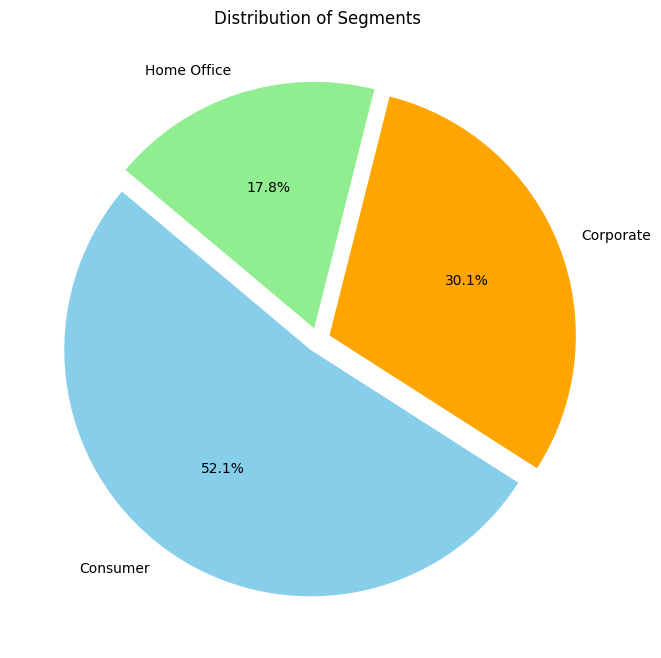

In [123]:
# Menghitung jumlah data berdasarkan segmen
segment_counts = superstore_df['Segment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=140,     # Mengatur rotasi awal
    colors=['skyblue', 'orange', 'lightgreen'],  # Warna kustom
    explode=(0.05, 0.05, 0.05)  # Sedikit memisahkan potongan
)
plt.title('Distribution of Segments')
plt.show()